## Data description:
We collect the GDP growth data and the factors that affect economic growth in Vietnam from 1996 to 2023. The time series data are collected from World Bank database:
- **FDI inflows**: Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor. It is the sum of equity capital, reinvestment of earnings, other long-term capital, and short-term capital as shown in the balance of payments. This series shows net inflows (new investment inflows less disinvestment) in the reporting economy from foreign investors, and is divided by GDP.
- **Exports of goods and services (BoP, current US$)**: Exports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from residents to nonresidents of general merchandise, net exports of goods under merchanting, nonmonetary gold, and services. Data are in current U.S. dollars. 
- **Gross fixed capital formation (annual % growth)**: Average annual growth of gross fixed capital formation based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. Gross fixed capital formation (formerly gross domestic fixed investment) includes land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. 

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                28 non-null     int64  
 1   GDP growth rate (%)                 28 non-null     float64
 2   FDI inflow (BoP, US$)               28 non-null     int64  
 3   Export (BoP, US$)                   28 non-null     float64
 4   Gross capital formation growth (%)  28 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [ ]:
# Convert to billion US
df["FDI inflow (BoP, US$)"] = (df["FDI inflow (BoP, US$)"] / 1000000000) 
df["Export (BoP, US$)"] = df["Export (BoP, US$)"] / 1000000000

# Label the columns
gdp = df["GDP growth rate (%)"]
fdi = df["FDI inflow (BoP, US$)"]
export = df["Export (BoP, US$)"]
capital = df["Gross capital formation growth (%)"]
year = df.Year
df

,Year,GDP growth rate (%),"FDI inflow (BoP, US$)","Export (BoP, US$)",Gross capital formation growth (%)
0,1996,9.340017,2.395000e-09,9.498000e-09,14.005828
1,1997,8.152084,2.220000e-09,1.171500e-08,10.162673
2,1998,5.764455,1.671000e-09,1.197700e-08,12.410715
3,1999,4.773587,1.412000e-09,1.403300e-08,1.577213
4,2000,6.787316,1.298000e-09,1.715000e-08,10.180380
5,2001,6.192893,1.300000e-09,1.783700e-08,10.719012
6,2002,6.320821,1.400000e-09,1.965400e-08,12.863915
7,2003,6.899063,1.450000e-09,2.342100e-08,11.901995
8,2004,7.536411,1.610000e-09,3.035200e-08,10.441264
9,2005,7.547248,1.954000e-09,3.662300e-08,9.750893


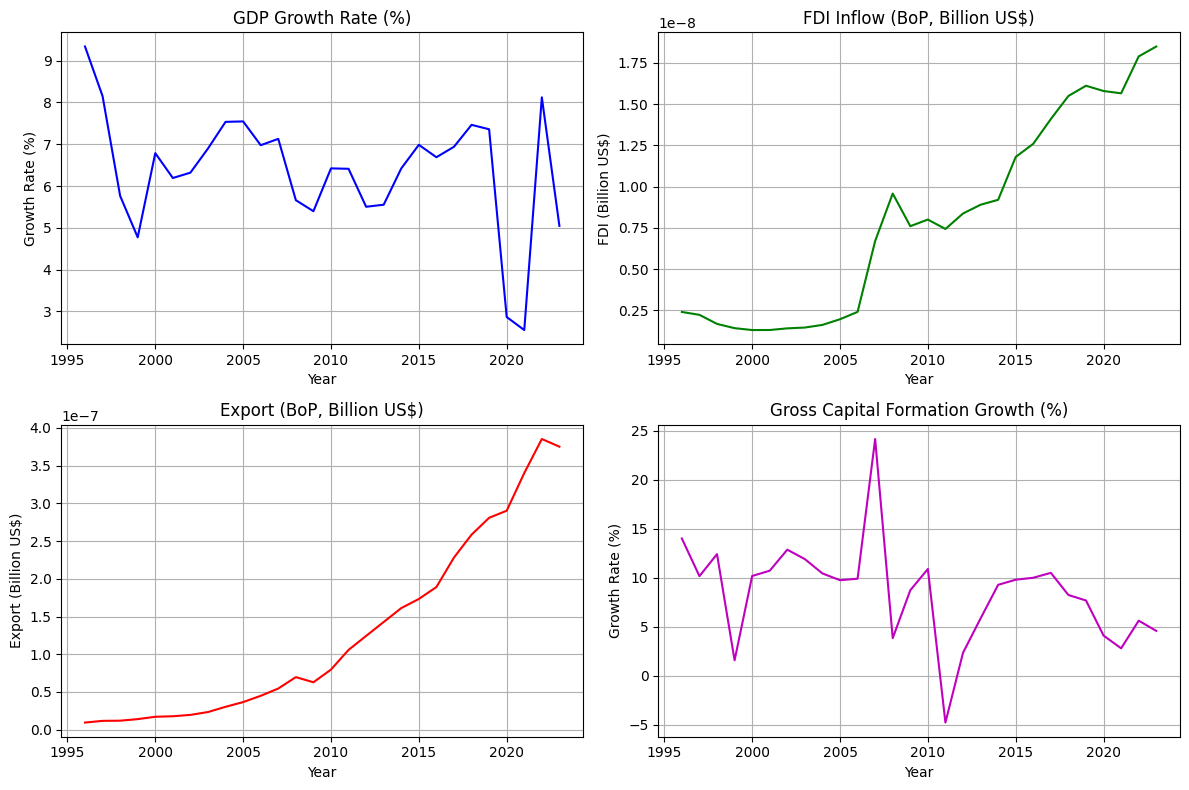

In [65]:
# Plot the indicators
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot GDP growth rate
axes[0, 0].plot(year, gdp, linestyle='-', color='b')
axes[0, 0].set_title("GDP Growth Rate (%)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Growth Rate (%)")
axes[0, 0].grid(True)

# Plot FDI inflow
axes[0, 1].plot(year, fdi, linestyle='-', color='g')
axes[0, 1].set_title("FDI Inflow (BoP, Billion US$)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("FDI (Billion US$)")
axes[0, 1].grid(True)

# Plot Export
axes[1, 0].plot(year, export, linestyle='-', color='r')
axes[1, 0].set_title("Export (BoP, Billion US$)")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Export (Billion US$)")
axes[1, 0].grid(True)

# Plot Gross Capital Formation Growth
axes[1, 1].plot(year, capital, linestyle='-', color='m')
axes[1, 1].set_title("Gross Capital Formation Growth (%)")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Growth Rate (%)")
axes[1, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
